In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "internlm2_5-20b-chat"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df["internlm/internlm2_5-20b-chat_torch.bfloat16_4bit_lf"] = df[
    "internlm/internlm2_5-20b-chat/shots-00"
]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   text                                                                 3000 non-null   object
 1   label                                                                3000 non-null   object
 2   title                                                                3000 non-null   object
 3   puzzle                                                               3000 non-null   object
 4   truth                                                                3000 non-null   object
 5   internlm/internlm2_5-20b-chat_torch.bfloat16_4bit_lf                 3000 non-null   object
 6   internlm/internlm2_5-20b-chat/checkpoint-105_torch.bfloat16_4bit_lf  3000 non-null   object
 7   internlm/intern

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'internlm/internlm2_5-20b-chat_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/checkpoint-105_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/checkpoint-140_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/checkpoint-175_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/checkpoint-210_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/checkpoint-245_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/checkpoint-280_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/checkpoint-315_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/checkpoint-35_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/checkpoint-350_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/checkpoint-70_torch.bfloat16_4bit_lf',
 'internlm/internlm2_5-20b-chat/shots-00']

In [9]:
df_val = pd.read_csv("datasets/mgtv/val.csv")
# df_val = pd.read_csv("datasets/mgtv/dev.csv")
df["label"] = df_val["label"]

In [10]:
perf_df = get_metrics_df(df)
perf_df

columns: ['internlm/internlm2_5-20b-chat_torch.bfloat16_4bit_lf', 'internlm/internlm2_5-20b-chat/checkpoint-35_torch.bfloat16_4bit_lf', 'internlm/internlm2_5-20b-chat/checkpoint-70_torch.bfloat16_4bit_lf', 'internlm/internlm2_5-20b-chat/checkpoint-105_torch.bfloat16_4bit_lf', 'internlm/internlm2_5-20b-chat/checkpoint-140_torch.bfloat16_4bit_lf', 'internlm/internlm2_5-20b-chat/checkpoint-175_torch.bfloat16_4bit_lf', 'internlm/internlm2_5-20b-chat/checkpoint-210_torch.bfloat16_4bit_lf', 'internlm/internlm2_5-20b-chat/checkpoint-245_torch.bfloat16_4bit_lf', 'internlm/internlm2_5-20b-chat/checkpoint-280_torch.bfloat16_4bit_lf', 'internlm/internlm2_5-20b-chat/checkpoint-315_torch.bfloat16_4bit_lf', 'internlm/internlm2_5-20b-chat/checkpoint-350_torch.bfloat16_4bit_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:504: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                 model  \
0     0.0  internlm2_5-20b-chat   
1     0.2  internlm2_5-20b-chat   
2     0.4  internlm2_5-20b-chat   
3     0.6  internlm2_5-20b-chat   
4     0.8  internlm2_5-20b-chat   
5     1.0  internlm2_5-20b-chat   
6     1.2  internlm2_5-20b-chat   
7     1.4  internlm2_5-20b-chat   
8     1.6  internlm2_5-20b-chat   
9     1.8  internlm2_5-20b-chat   
10    2.0  internlm2_5-20b-chat   

                                                  run  accuracy  precision  \
0   internlm/internlm2_5-20b-chat_torch.bfloat16_4...  0.564000   0.774526   
1   internlm/internlm2_5-20b-chat/checkpoint-35_to...  0.757667   0.796064   
2   internlm/internlm2_5-20b-chat/checkpoint-70_to...  0.774333   0.804279   
3   internlm/internlm2_5-20b-chat/checkpoint-105_t...  0.705333   0.807059   
4   internlm/internlm2_5-20b-chat/checkpoint-140_t...  0.795000   0.817458   
5   internlm/internlm2_5-20b-chat/checkpoint-175_t...  0.778667   0.822051   
6   internlm/internlm2_5-20b-chat/checkpoint-210_t...  0.751667   0.826468   
7   internlm/internlm2_5-20b-chat/checkpoint-245_t...  0.787667   0.815419   
8   internlm/internlm2_5-20b-chat/checkpoint-280_t...  0.775333   0.818113   
9   internlm/internlm2_5-20b-chat/checkpoint-315_t...  0.758333   0.817952   
10  internlm/internlm2_5-20b-chat/checkpoint-350_t...  0.761667   0.820848   

      recall        f1  ratio_valid_classifications  
0   0.564000  0.635219                     0.672667  
1   0.757667  0.769347                     1.000000  
2   0.774333  0.784923                     1.000000  
3   0.705333  0.742199                     1.000000  
4   0.795000  0.802755                     1.000000  
5   0.778667  0.793835                     1.000000  
6   0.751667  0.778709                     1.000000  
7   0.787667  0.796540                     1.000000  
8   0.775333  0.789979                     1.000000  
9   0.758333  0.779536                     1.000000  
10  0.761667  0.782674                     1.000000

0.0: internlm/internlm2_5-20b-chat_torch.bfloat16_4bit_lf
0.2: internlm/internlm2_5-20b-chat/checkpoint-35_torch.bfloat16_4bit_lf
0.4: internlm/internlm2_5-20b-chat/checkpoint-70_torch.bfloat16_4bit_lf
0.6: internlm/internlm2_5-20b-chat/checkpoint-105_torch.bfloat16_4bit_lf
0.8: internlm/internlm2_5-20b-chat/checkpoint-140_torch.bfloat16_4bit_lf
1.0: internlm/internlm2_5-20b-chat/checkpoint-175_torch.bfloat16_4bit_lf
1.2: internlm/internlm2_5-20b-chat/checkpoint-210_torch.bfloat16_4bit_lf
1.4: internlm/internlm2_5-20b-chat/checkpoint-245_torch.bfloat16_4bit_lf
1.6: internlm/internlm2_5-20b-chat/checkpoint-280_torch.bfloat16_4bit_lf
1.8: internlm/internlm2_5-20b-chat/checkpoint-315_torch.bfloat16_4bit_lf
2.0: internlm/internlm2_5-20b-chat/checkpoint-350_torch.bfloat16_4bit_lf


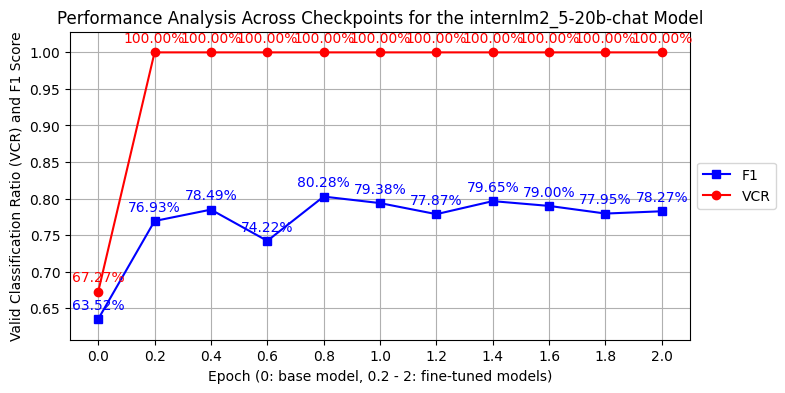

In [11]:
plot_metrics(perf_df, model_name)

In [12]:
perf_df.to_csv(metrics_csv, index=False)

In [13]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['internlm/internlm2_5-20b-chat/shots-00']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:504: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots                 model                                     run  \
0     0  internlm2_5-20b-chat  internlm/internlm2_5-20b-chat/shots-00   

   accuracy  precision  recall        f1  ratio_valid_classifications  
0     0.564   0.774526   0.564  0.635219                     0.672667

0: internlm/internlm2_5-20b-chat/shots-00


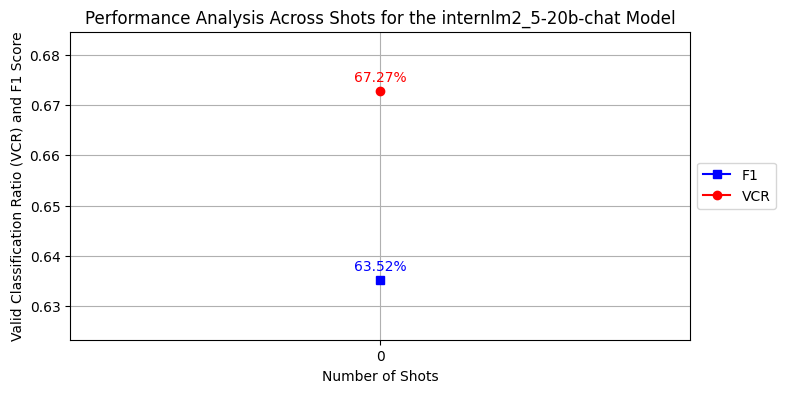

In [14]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [15]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** internlm/internlm2_5-20b-chat_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat_torch.bfloat16_4bit_lf
是                                                                                                                                   905
不是                                                                                                                                  841
不重要                                                                                                                                 216
问法错误                                                                                                                                 43
回答正确                                                                                                                                 13
                                                                                                                                   ... 
问法错误\n\n根据游戏规则，这个问题“他喝了水”不是一个封闭式问题，因为它没有提供足够的信息来指向一个明确的答

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23229 (\N{CJK UNIFIED IDEOGRAPH-5ABD}) missing from font(s) Songti SC.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21966 (\N{CJK UNIFIED IDEOGRAPH-55CE}) missing from font(s) Songti SC.
  fig.canvas.print_figure(bytes_io, **kw)


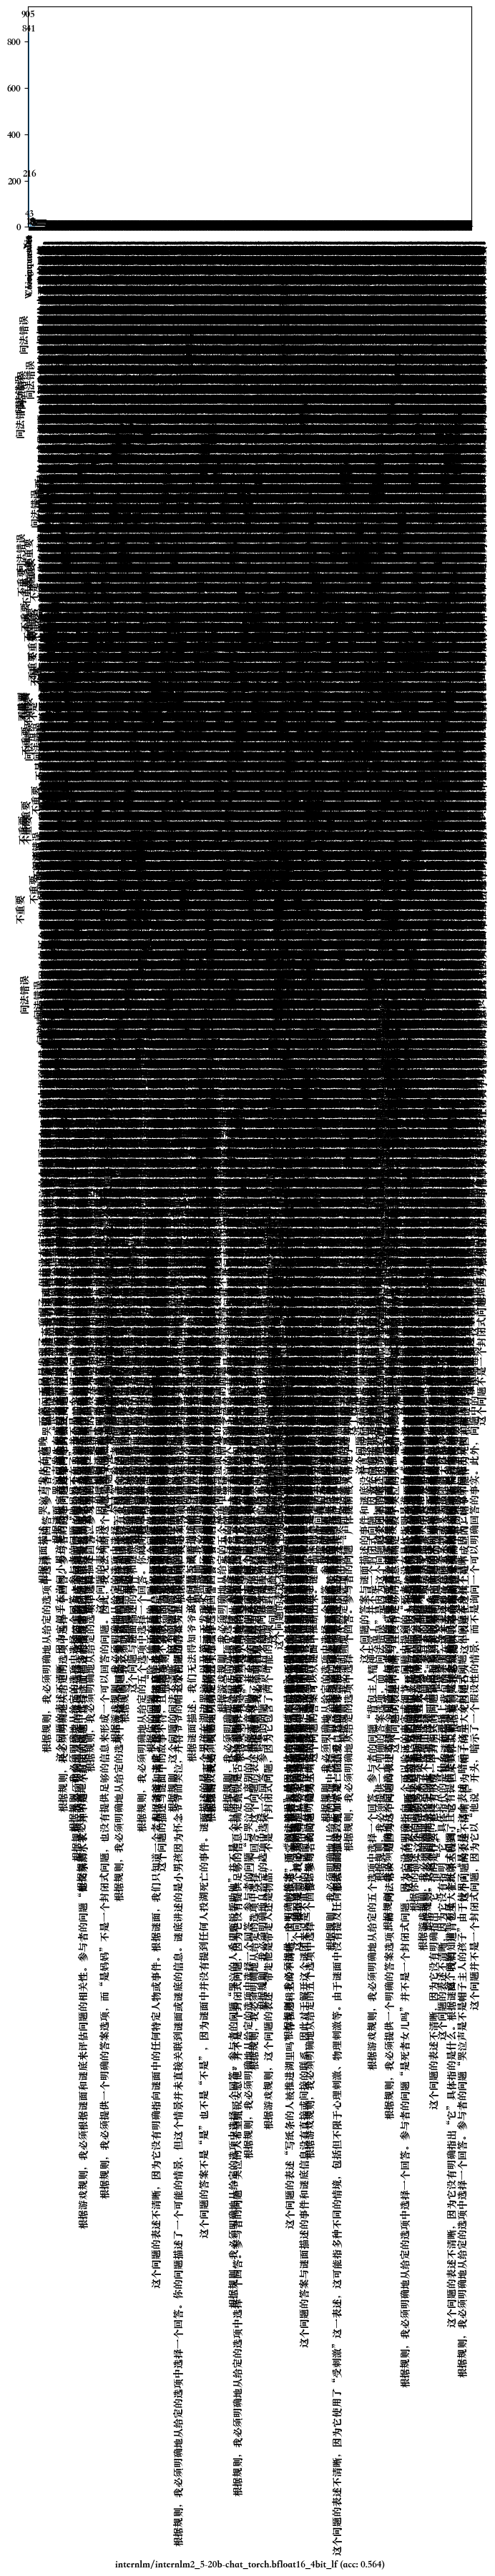

********** internlm/internlm2_5-20b-chat/checkpoint-105_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-105_torch.bfloat16_4bit_lf
不是      1331
是       1024
不重要      593
问法错误      34
回答正确      18
Name: count, dtype: int64


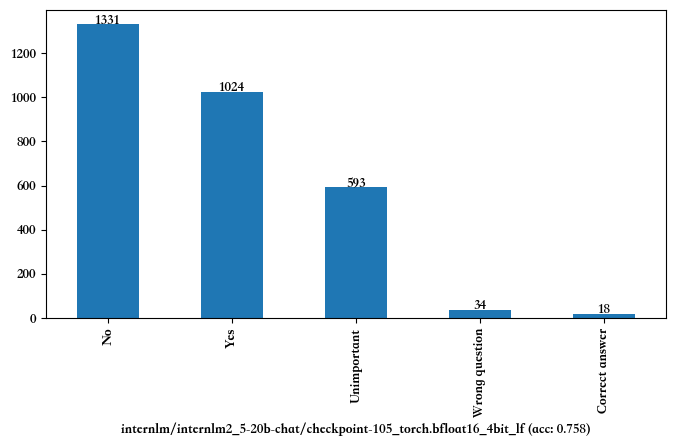

********** internlm/internlm2_5-20b-chat/checkpoint-140_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-140_torch.bfloat16_4bit_lf
不是      1540
是       1145
不重要      254
问法错误      45
回答正确      16
Name: count, dtype: int64


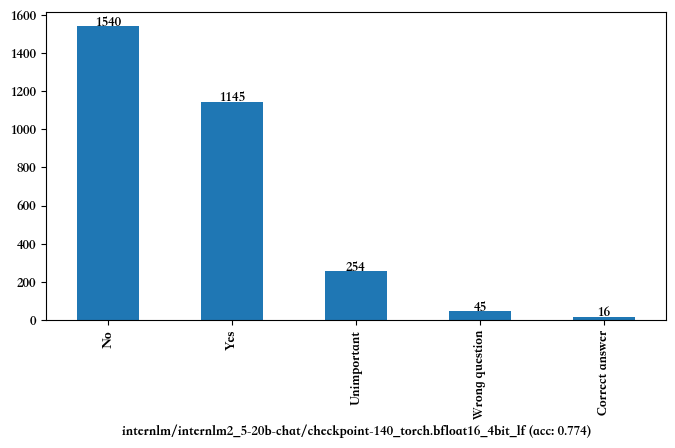

********** internlm/internlm2_5-20b-chat/checkpoint-175_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-175_torch.bfloat16_4bit_lf
不是      1414
是       1181
不重要      335
问法错误      59
回答正确      11
Name: count, dtype: int64


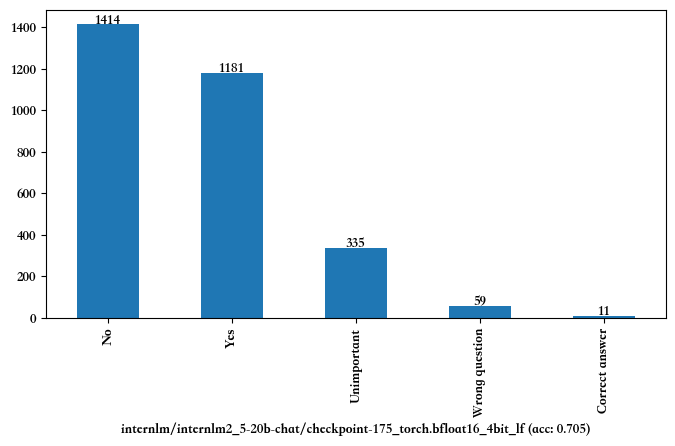

********** internlm/internlm2_5-20b-chat/checkpoint-210_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-210_torch.bfloat16_4bit_lf
不是      1310
是       1156
不重要      453
问法错误      67
回答正确      14
Name: count, dtype: int64


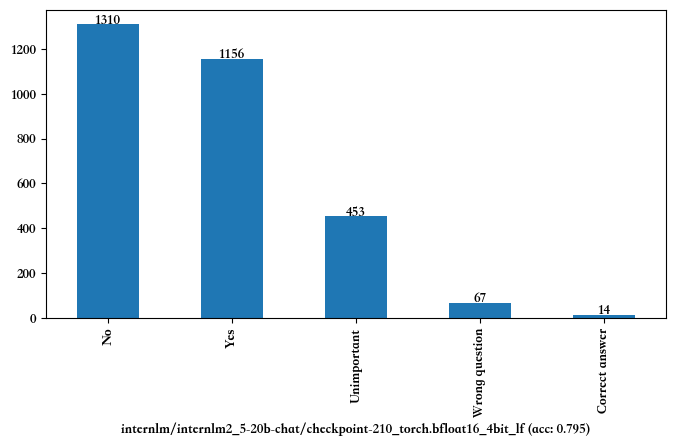

********** internlm/internlm2_5-20b-chat/checkpoint-245_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-245_torch.bfloat16_4bit_lf
不是      1478
是       1188
不重要      283
问法错误      41
回答正确      10
Name: count, dtype: int64


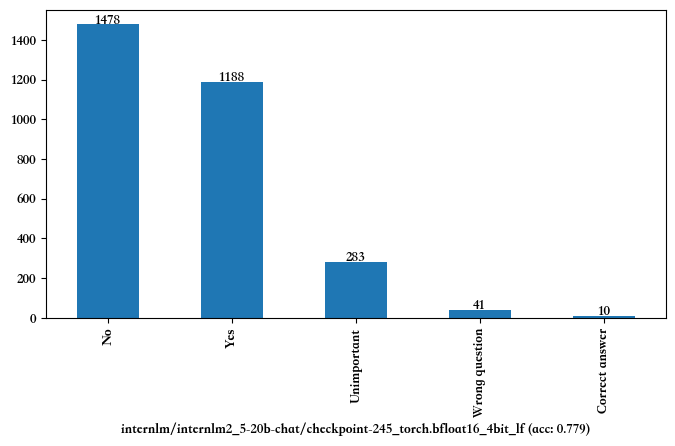

********** internlm/internlm2_5-20b-chat/checkpoint-280_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-280_torch.bfloat16_4bit_lf
不是      1439
是       1162
不重要      351
问法错误      37
回答正确      11
Name: count, dtype: int64


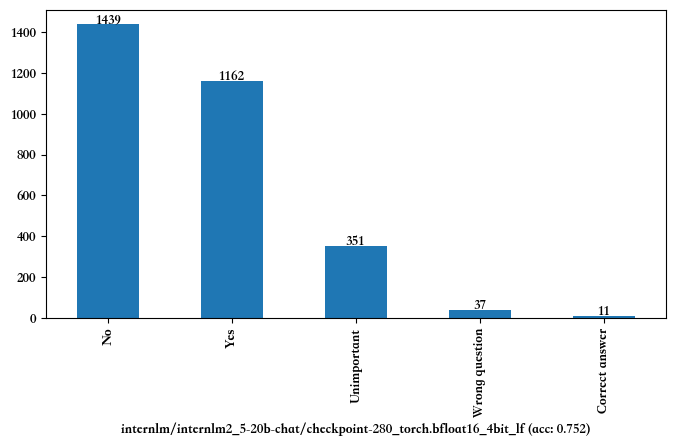

********** internlm/internlm2_5-20b-chat/checkpoint-315_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-315_torch.bfloat16_4bit_lf
不是      1410
是       1121
不重要      422
问法错误      34
回答正确      13
Name: count, dtype: int64


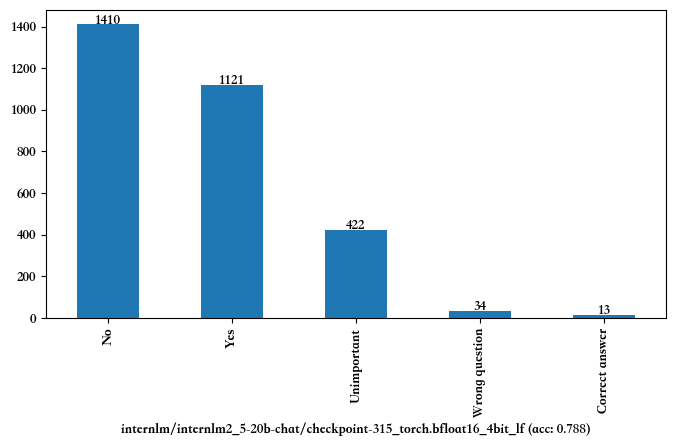

********** internlm/internlm2_5-20b-chat/checkpoint-35_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-35_torch.bfloat16_4bit_lf
不是      1498
是       1131
不重要      339
问法错误      26
回答正确       6
Name: count, dtype: int64


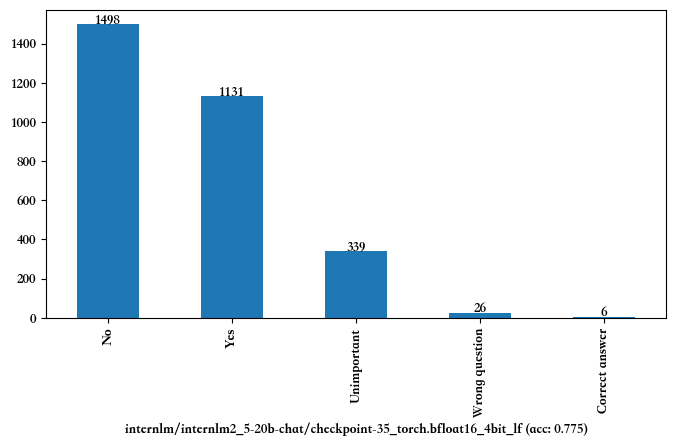

********** internlm/internlm2_5-20b-chat/checkpoint-350_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-350_torch.bfloat16_4bit_lf
不是      1402
是       1130
不重要      420
问法错误      35
回答正确      13
Name: count, dtype: int64


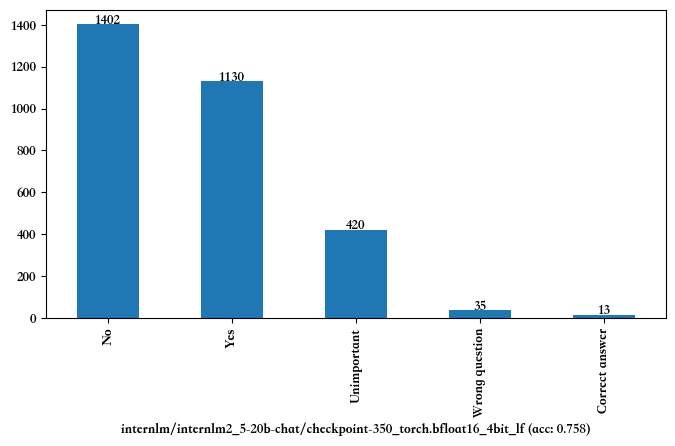

********** internlm/internlm2_5-20b-chat/checkpoint-70_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-70_torch.bfloat16_4bit_lf
不是      1449
是       1200
不重要      307
问法错误      27
回答正确      17
Name: count, dtype: int64


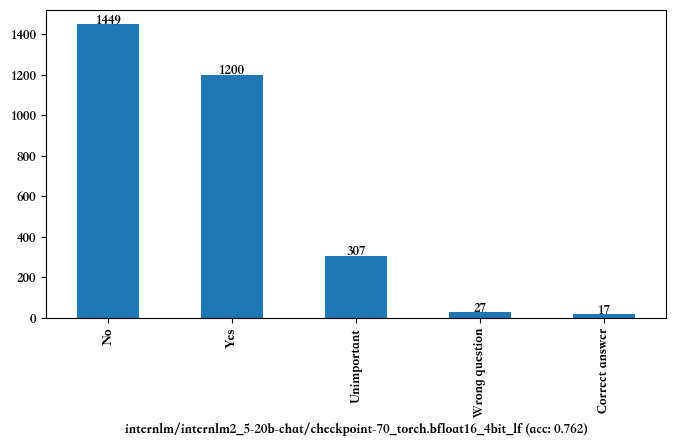

In [16]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** internlm/internlm2_5-20b-chat_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat_torch.bfloat16_4bit_lf
是                                                                                                                                   905
不是                                                                                                                                  841
不重要                                                                                                                                 216
问法错误                                                                                                                                 43
回答正确                                                                                                                                 13
                                                                                                                                   ... 
问法错误\n\n根据游戏规则，这个问题“他喝了水”不是一个封闭式问题，因为它没有提供足够的信息来指向一个明确的答

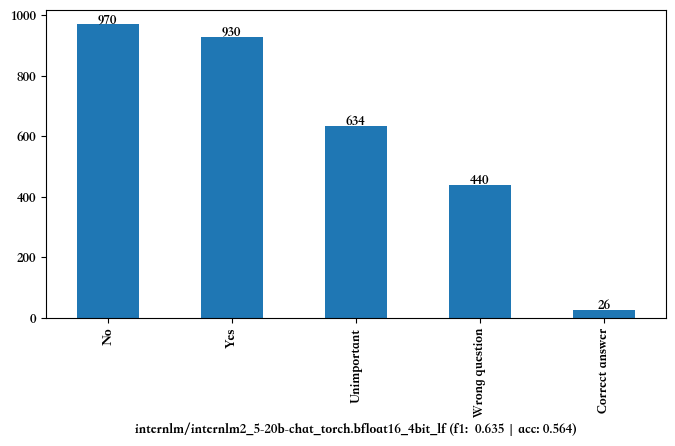

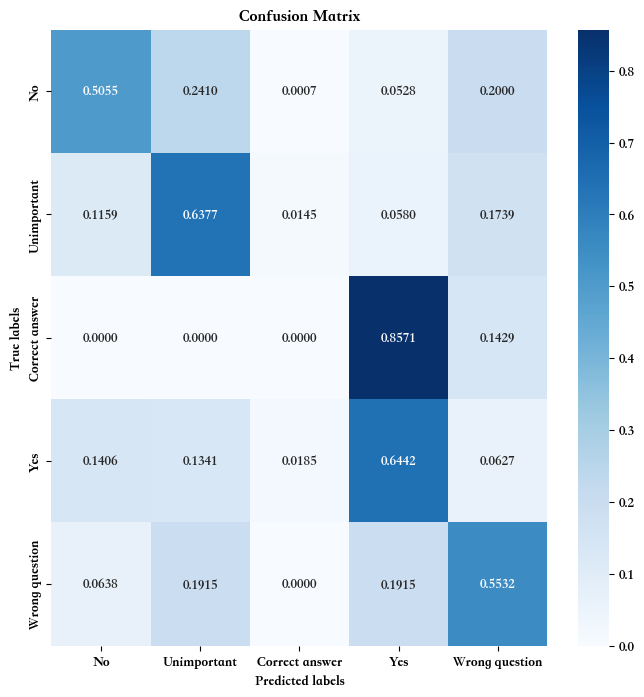

********** internlm/internlm2_5-20b-chat/checkpoint-105_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-105_torch.bfloat16_4bit_lf
不是      1331
是       1024
不重要      593
问法错误      34
回答正确      18
Name: count, dtype: int64


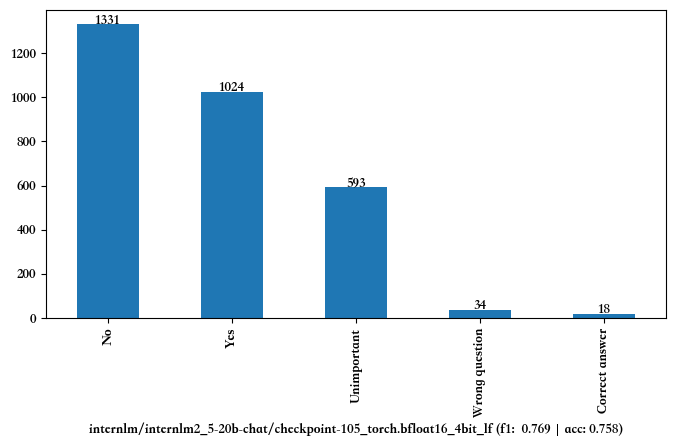

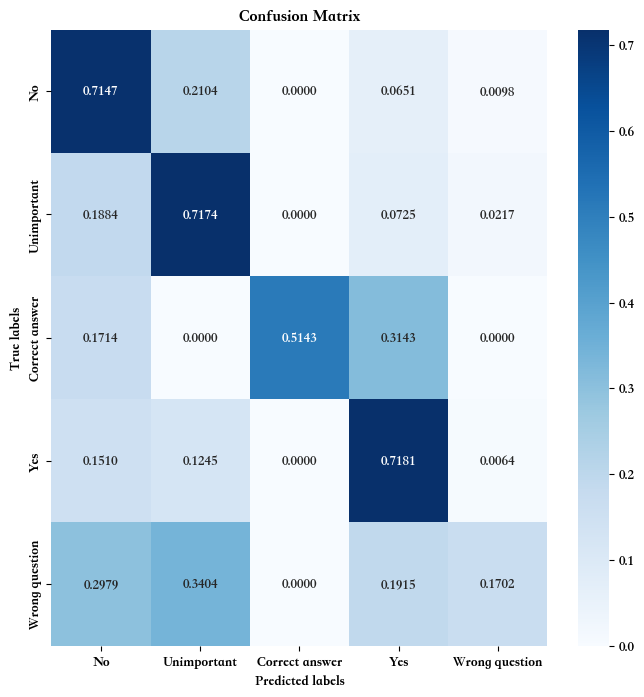

********** internlm/internlm2_5-20b-chat/checkpoint-140_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-140_torch.bfloat16_4bit_lf
不是      1540
是       1145
不重要      254
问法错误      45
回答正确      16
Name: count, dtype: int64


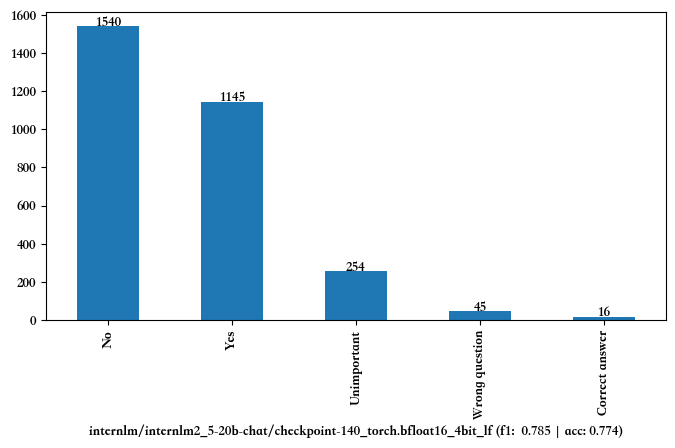

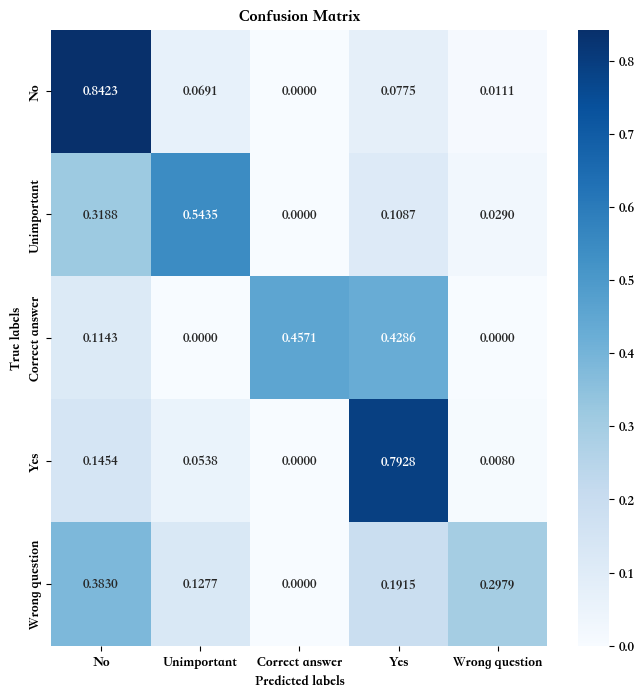

********** internlm/internlm2_5-20b-chat/checkpoint-175_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-175_torch.bfloat16_4bit_lf
不是      1414
是       1181
不重要      335
问法错误      59
回答正确      11
Name: count, dtype: int64


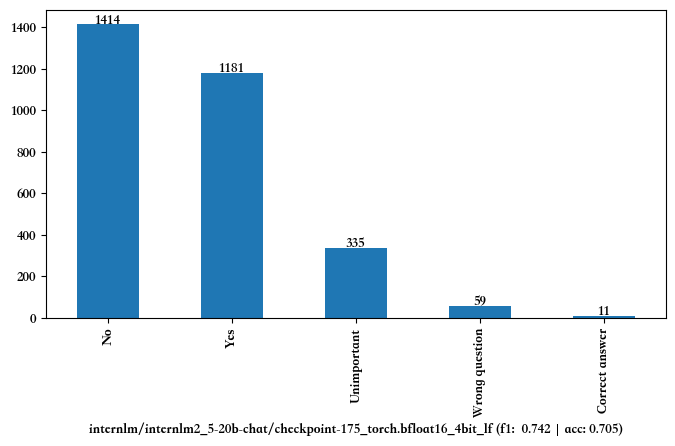

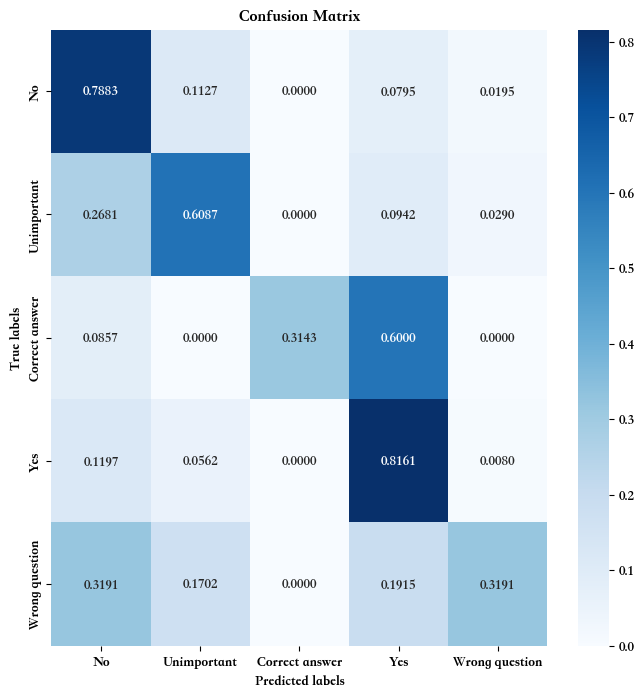

********** internlm/internlm2_5-20b-chat/checkpoint-210_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-210_torch.bfloat16_4bit_lf
不是      1310
是       1156
不重要      453
问法错误      67
回答正确      14
Name: count, dtype: int64


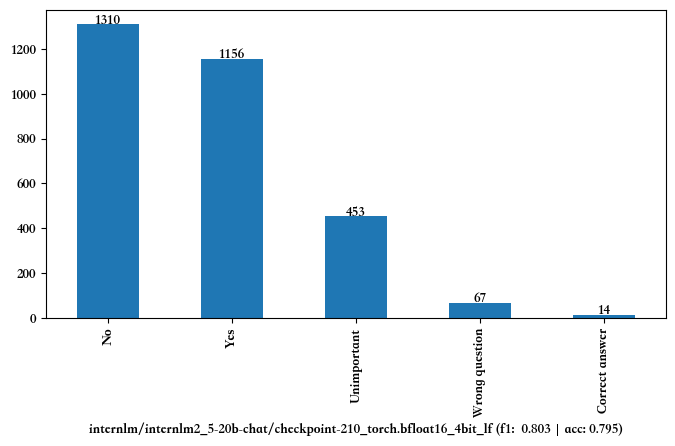

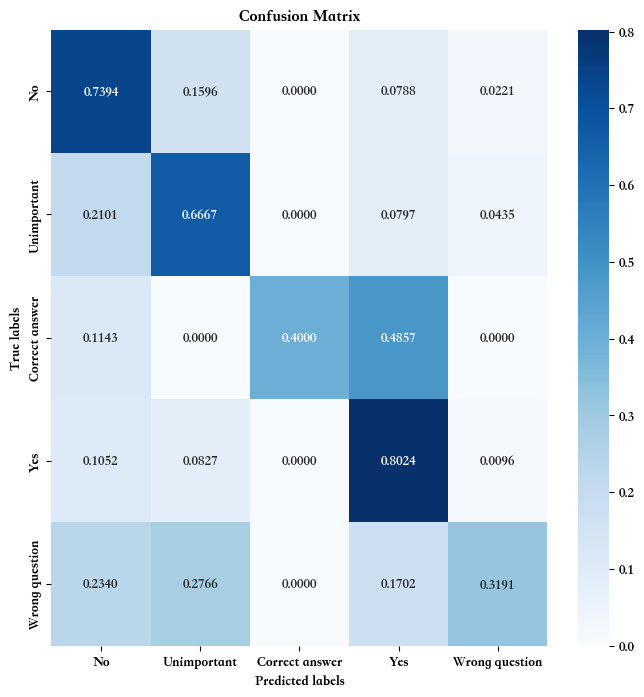

********** internlm/internlm2_5-20b-chat/checkpoint-245_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-245_torch.bfloat16_4bit_lf
不是      1478
是       1188
不重要      283
问法错误      41
回答正确      10
Name: count, dtype: int64


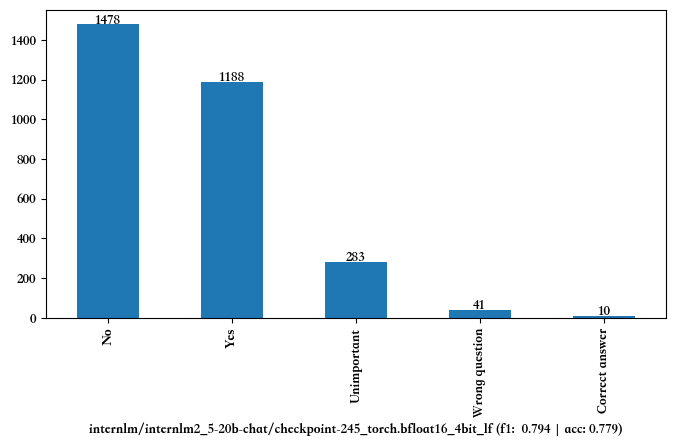

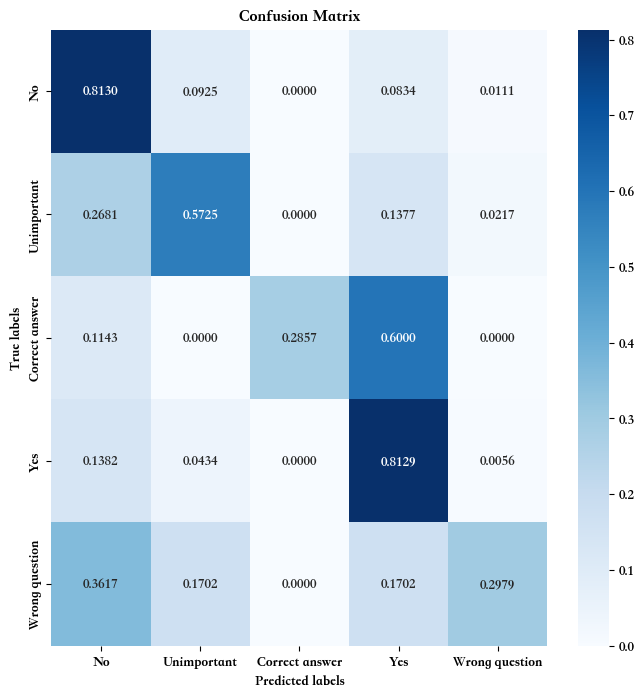

********** internlm/internlm2_5-20b-chat/checkpoint-280_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-280_torch.bfloat16_4bit_lf
不是      1439
是       1162
不重要      351
问法错误      37
回答正确      11
Name: count, dtype: int64


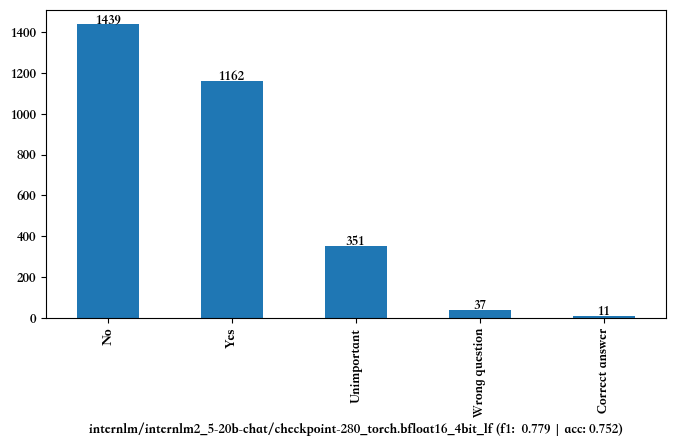

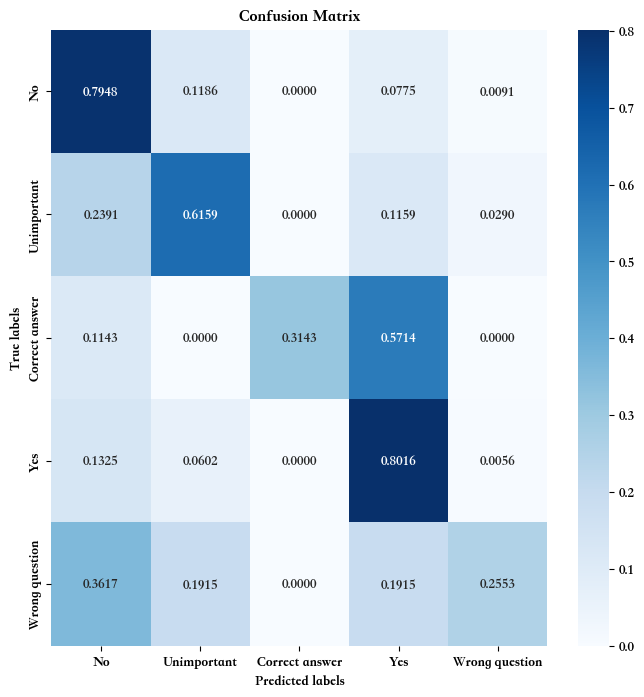

********** internlm/internlm2_5-20b-chat/checkpoint-315_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-315_torch.bfloat16_4bit_lf
不是      1410
是       1121
不重要      422
问法错误      34
回答正确      13
Name: count, dtype: int64


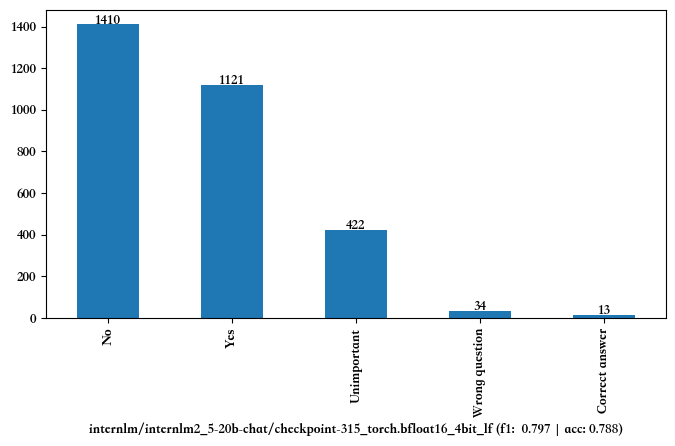

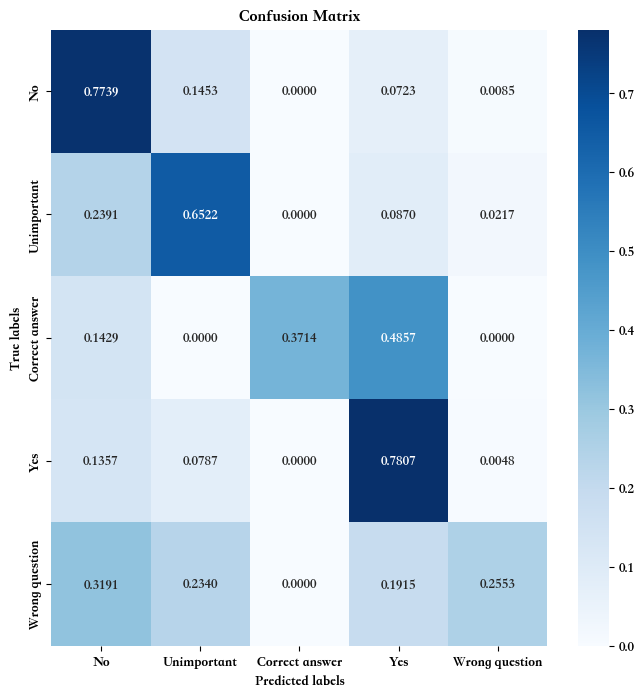

********** internlm/internlm2_5-20b-chat/checkpoint-35_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-35_torch.bfloat16_4bit_lf
不是      1498
是       1131
不重要      339
问法错误      26
回答正确       6
Name: count, dtype: int64


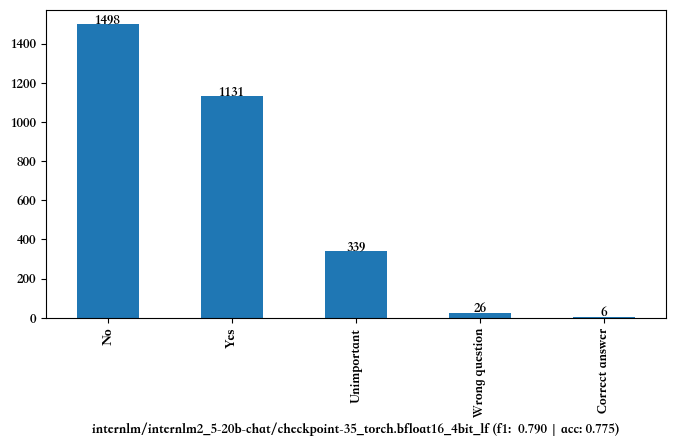

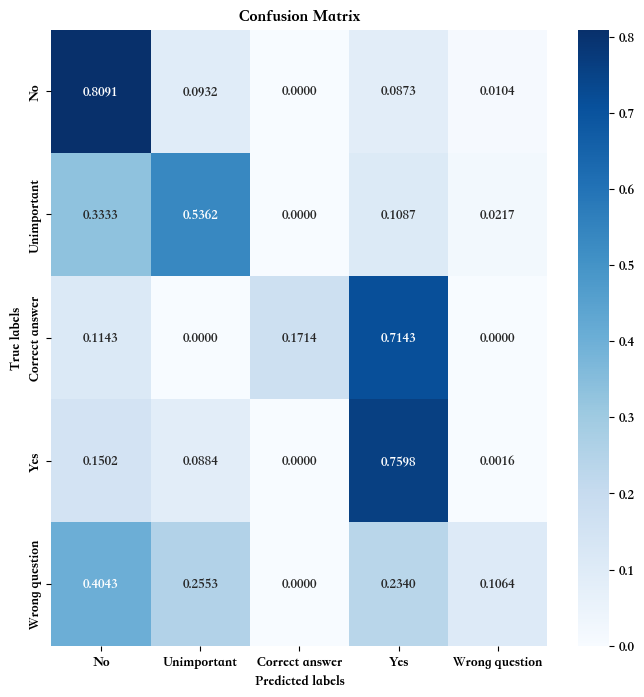

********** internlm/internlm2_5-20b-chat/checkpoint-350_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-350_torch.bfloat16_4bit_lf
不是      1402
是       1130
不重要      420
问法错误      35
回答正确      13
Name: count, dtype: int64


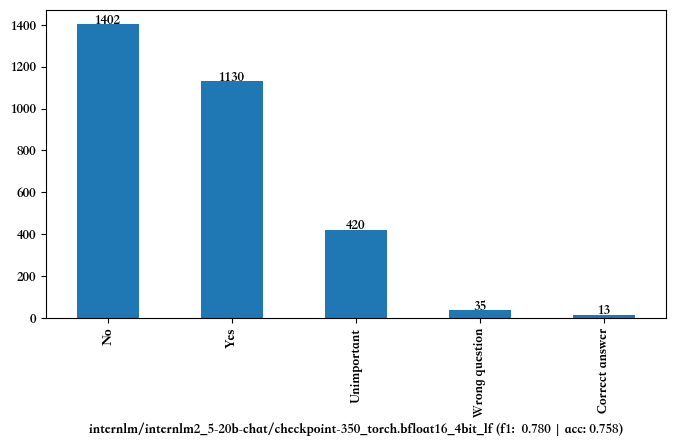

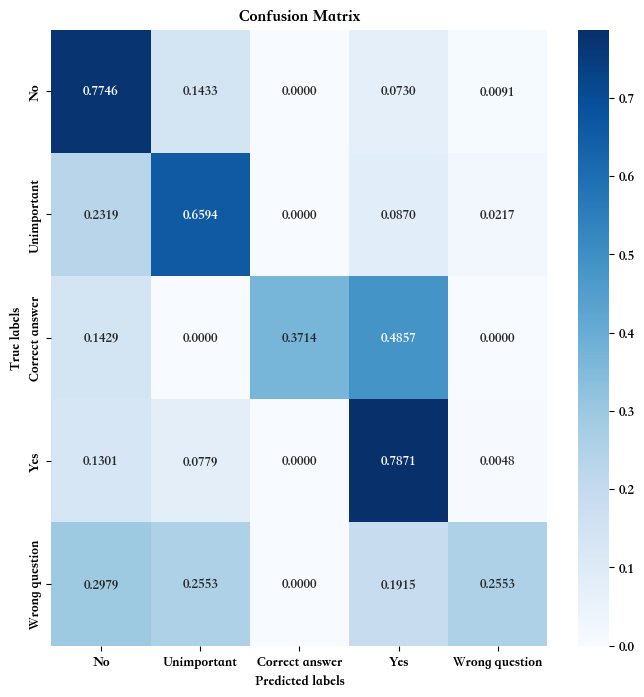

********** internlm/internlm2_5-20b-chat/checkpoint-70_torch.bfloat16_4bit_lf **********
internlm/internlm2_5-20b-chat/checkpoint-70_torch.bfloat16_4bit_lf
不是      1449
是       1200
不重要      307
问法错误      27
回答正确      17
Name: count, dtype: int64


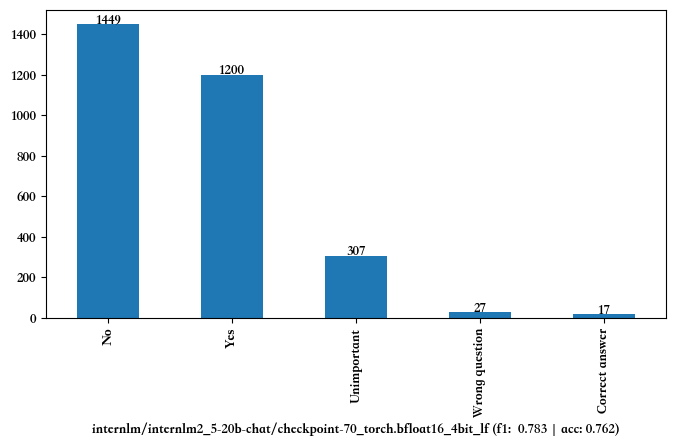

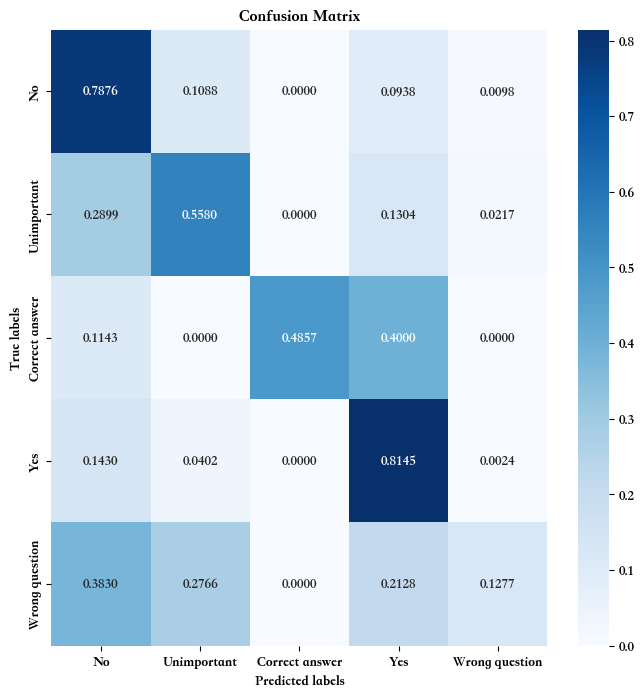

In [17]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** internlm/internlm2_5-20b-chat/shots-00 **********
internlm/internlm2_5-20b-chat/shots-00
是                                                                                                                                   905
不是                                                                                                                                  841
不重要                                                                                                                                 216
问法错误                                                                                                                                 43
回答正确                                                                                                                                 13
                                                                                                                                   ... 
问法错误\n\n根据游戏规则，这个问题“他喝了水”不是一个封闭式问题，因为它没有提供足够的信息来指向一个明确的答案。问题没有明确指出是喝了普通的水还是湖里的水，也没有明

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23229 (\N{CJK UNIFIED IDEOGRAPH-5ABD}) missing from font(s) Songti SC.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21966 (\N{CJK UNIFIED IDEOGRAPH-55CE}) missing from font(s) Songti SC.
  fig.canvas.print_figure(bytes_io, **kw)


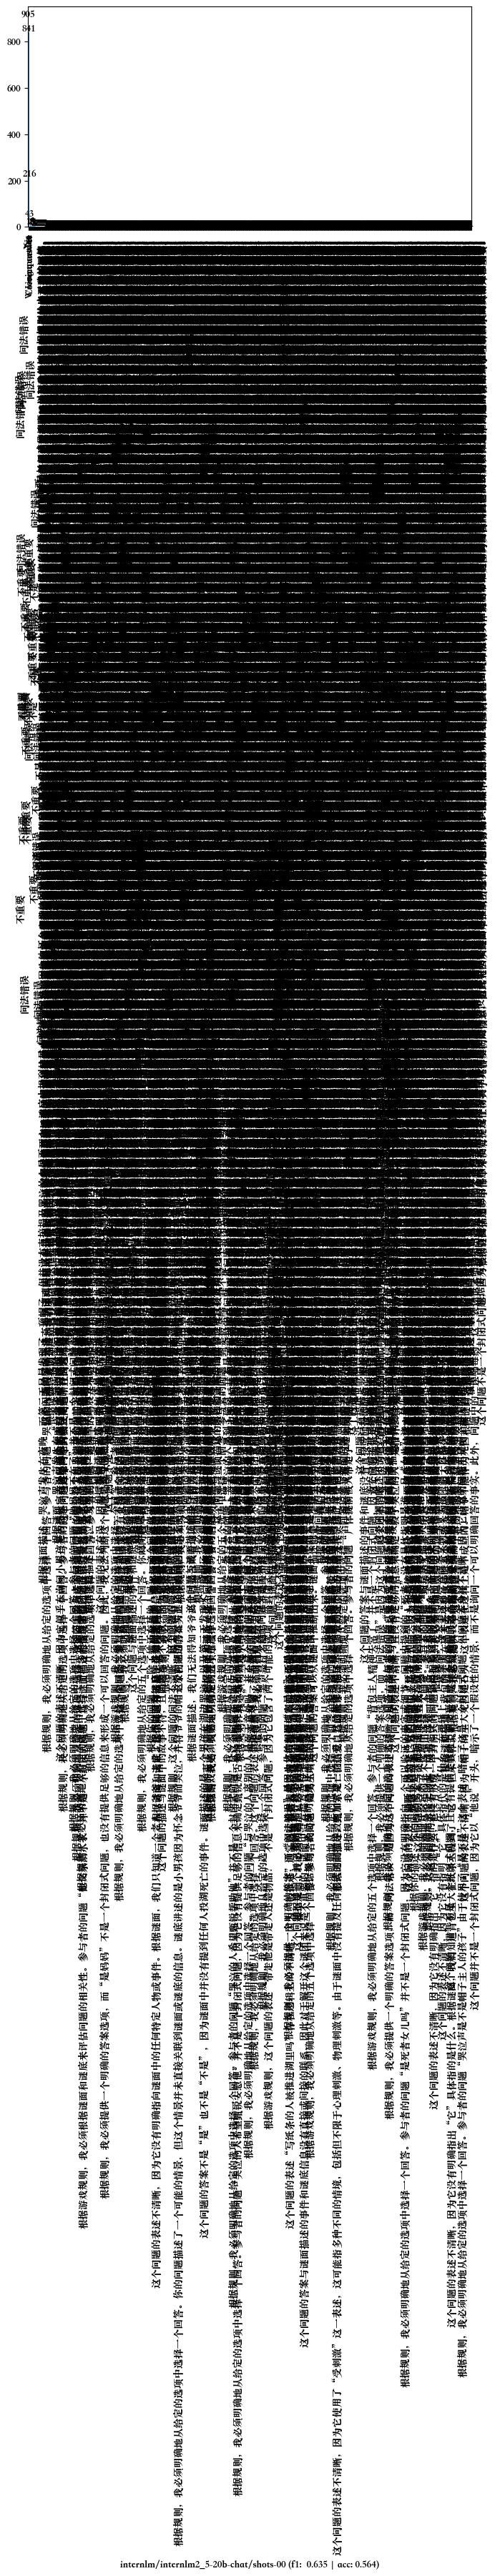

In [18]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
    )

********** internlm/internlm2_5-20b-chat/shots-00 **********
internlm/internlm2_5-20b-chat/shots-00
是                                                                                                                                   905
不是                                                                                                                                  841
不重要                                                                                                                                 216
问法错误                                                                                                                                 43
回答正确                                                                                                                                 13
                                                                                                                                   ... 
问法错误\n\n根据游戏规则，这个问题“他喝了水”不是一个封闭式问题，因为它没有提供足够的信息来指向一个明确的答案。问题没有明确指出是喝了普通的水还是湖里的水，也没有明

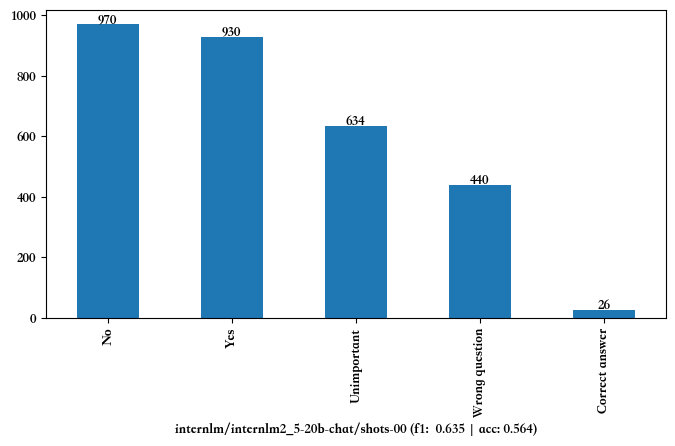

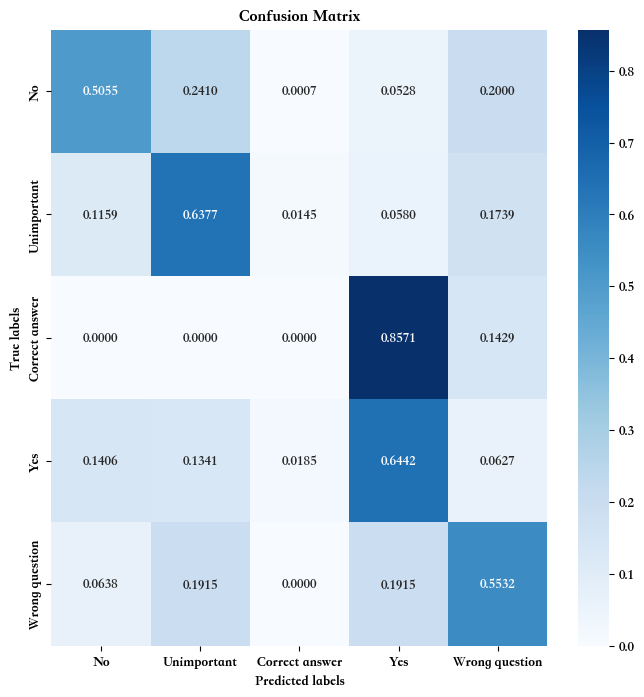

In [19]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )